In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from datetime import datetime

## Лабораторная работа 5.1

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов.

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день.

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

In [ ]:
data = np.load('average_ratings.npy')
toast = data[0]
cake = data[1]
tea = data[2]
day = list(range(len(tea)))

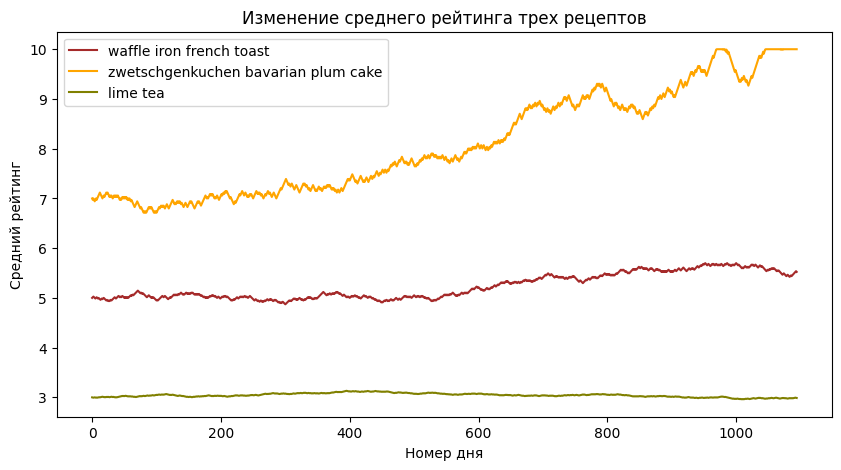

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
line1, = ax.plot(day, toast, color='brown', label='waffle iron french toast')
line2, = ax.plot(day, cake, color='orange', label='zwetschgenkuchen bavarian plum cake')
line3, = ax.plot(day, tea, color='olive', label='lime tea')
ax.legend(handles=[line1, line2, line3])
ax.set_xlabel('Номер дня')
ax.set_ylabel('Средний рейтинг')
ax.set_title('Изменение среднего рейтинга трех рецептов')
plt.show()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".

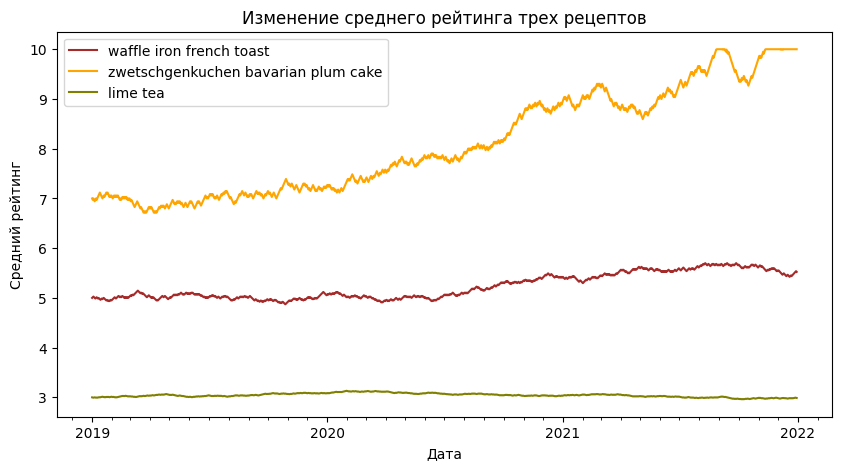

In [ ]:
dates = pd.date_range(start='01.01.2019', end='30.12.2021')

fig, ax = plt.subplots(figsize=(10, 5))
line1, = ax.plot(dates, toast, color='brown', label='waffle iron french toast')
line2, = ax.plot(dates, cake, color='orange', label='zwetschgenkuchen bavarian plum cake')
line3, = ax.plot(dates, tea, color='olive', label='lime tea')
ax.legend(handles=[line1, line2, line3])
ax.set_xlabel('Дата')
ax.set_ylabel('Средний рейтинг')
ax.set_title('Изменение среднего рейтинга трех рецептов')

ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_minor_locator(mdates.MonthLocator())

plt.show()

3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2.

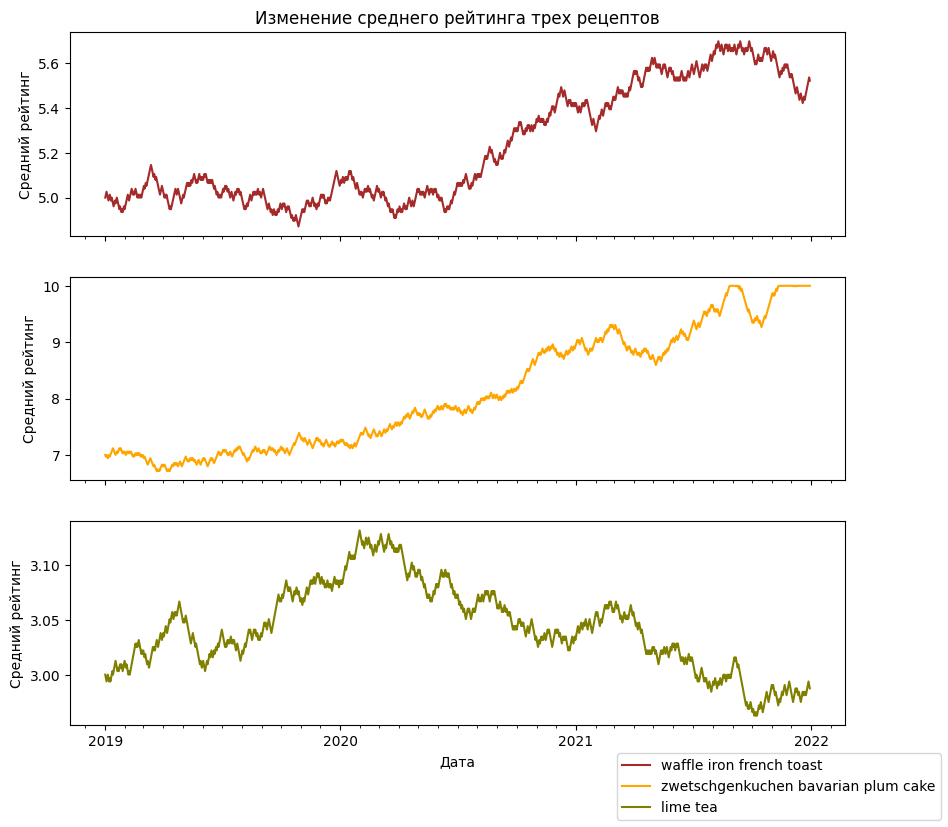

In [ ]:
dates = pd.date_range(start='01.01.2019', end='30.12.2021')

fig, ax = plt.subplots(figsize=(10, 9), nrows=3, ncols=1, sharex='col')
line1, = ax[0].plot(dates, toast, color='brown', label='waffle iron french toast')
line2, = ax[1].plot(dates, cake, color='orange', label='zwetschgenkuchen bavarian plum cake')
line3, = ax[2].plot(dates, tea, color='olive', label='lime tea')
fig.legend(handles=[line1, line2, line3], loc='lower right')
ax[2].set_xlabel('Дата')
ax[2].xaxis.set_major_locator(mdates.YearLocator())
ax[2].xaxis.set_minor_locator(mdates.MonthLocator())

for axi in ax:
  axi.set_ylabel('Средний рейтинг')

ax[0].set_title('Изменение среднего рейтинга трех рецептов')
plt.show()

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".

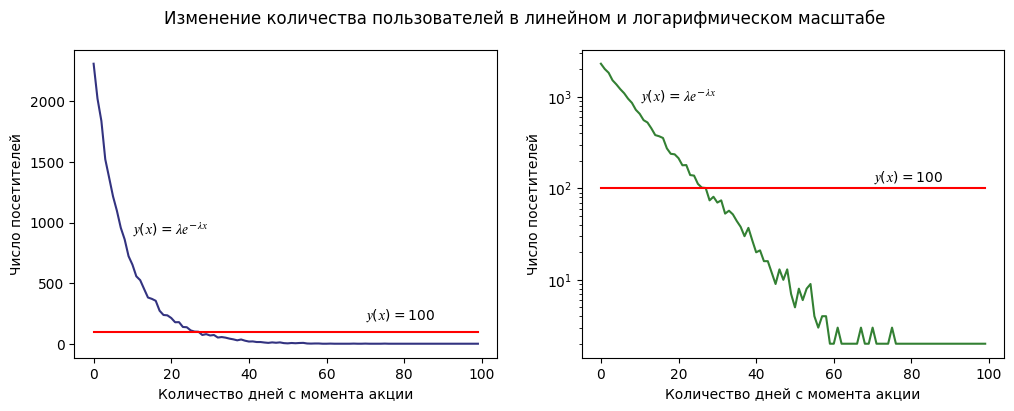

In [ ]:
data = np.load('visitors.npy')
fig, ax = plt.subplots(figsize=(12, 4), nrows=1, ncols=2)
line1, = ax[0].plot(range(100), data, color=(0.2, 0.2, 0.5))
line2, = ax[1].plot(range(100), data, color=(0.2, 0.5, 0.2))
ax[1].set_yscale('log')

line3, = ax[0].plot(range(100), [100] * 100, color='r')
line4, = ax[1].plot(range(100), [100] * 100, color='r')

ax[0].text(10, 900, '$𝑦 (𝑥)=𝜆𝑒^{−𝜆𝑥}$')
ax[0].text(70, 200, '$𝑦 (𝑥) = 100$')
ax[1].text(10, 900, '$𝑦 (𝑥)=𝜆𝑒^{−𝜆𝑥}$')
ax[1].text(70, 120, '$𝑦 (𝑥) = 100$')

for axi in ax:
  axi.set_xlabel('Количество дней с момента акции')
  axi.set_ylabel('Число посетителей')

fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе')
plt.show()

## Лабораторная работа 5.2


Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [ ]:
recipes = pd.read_csv('recipes_sample.csv')
reviews = pd.read_csv('reviews_sample.csv', index_col=0, parse_dates=['date'])

In [ ]:
recipes.head()

,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients
0,george s at the cove black bean soup,44123,90,35193,2002-10-25,NaN,an original recipe created by chef scott meska...,18.0
1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,NaN,my children and their friends ask for my homem...,NaN
2,i can t believe it s spinach,38798,30,1533,2002-08-29,NaN,"these were so go, it surprised even me.",8.0
3,italian gut busters,35173,45,22724,2002-07-27,NaN,my sister-in-law made these for us at a family...,NaN
4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4.0,i think a fondue is a very romantic casual din...,NaN


5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

In [ ]:
short1 = recipes[recipes['minutes'] < 5]
med1 = recipes[(5 <= recipes['minutes']) & (recipes['minutes'] < 50)]
long1 = recipes[recipes['minutes'] >= 50]

short_steps = short1['n_steps'].mean()
med_steps = med1['n_steps'].mean()
long_steps = long1['n_steps'].mean()

short_size = short1.shape[0]
med_size = med1.shape[0]
long_size = long1.shape[0]

df = pd.DataFrame({'Средняя длительность' : {'Короткие': short_steps, 'Средние': med_steps, 'Длинные': long_steps}, 'Размеры групп рецептов': {'Короткие': short_size, 'Средние': med_size, 'Длинные': long_size}})
df

,Средняя длительность,Размеры групп рецептов
Короткие,4.990431,675
Средние,8.581922,17607
Длинные,11.917290,11718


Text(0, 0.5, '')

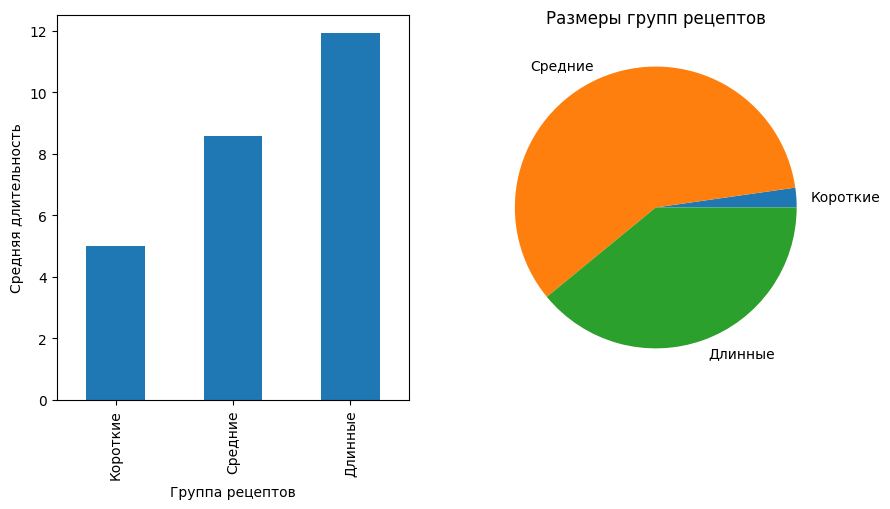

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5), ncols=2, nrows=1)
df['Средняя длительность'].plot(kind='bar', ax=ax[0]);
df['Размеры групп рецептов'].plot(kind='pie', ax=ax[1], title='Размеры групп рецептов')

ax[0].set_xlabel('Группа рецептов')
ax[0].set_ylabel('Средняя длительность')
ax[1].set_ylabel('')

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

In [ ]:
reviews.head()

,user_id,recipe_id,date,rating,review
370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...


Text(0.5, 0.98, 'Гистограммы рейтинга отзывов в 2008 и 2009 годах')

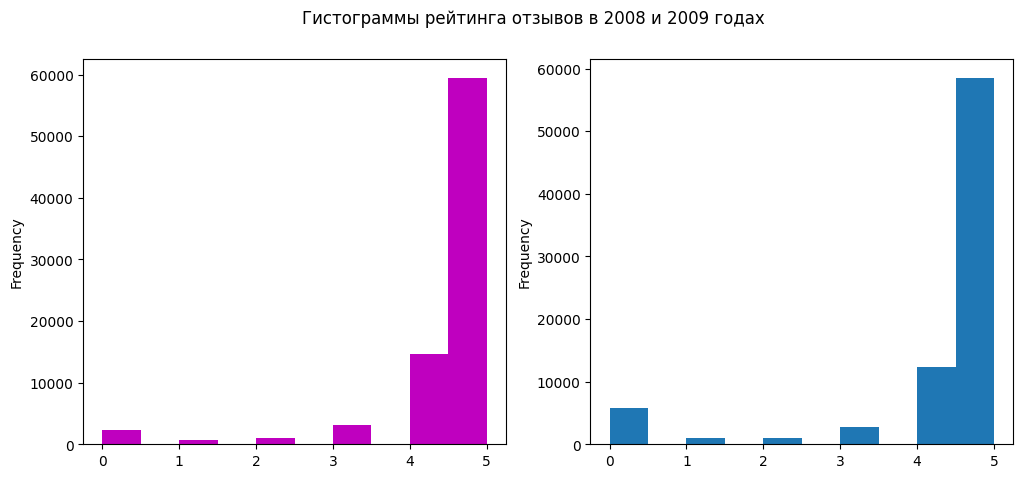

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5), ncols=2, nrows=1)
df1 = reviews[reviews['date'] <= datetime(2009, 12, 31)]
df2 = reviews[reviews['date'] >= datetime(2008, 1, 1)]
df1['rating'].plot.hist(ax=ax[0], color='m')
df2['rating'].plot.hist(ax=ax[1])
fig.suptitle('Гистограммы рейтинга отзывов в 2008 и 2009 годах')

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5).

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

<ipython-input-192-bc005bef8030>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['minutes'] = r_type


Text(0.5, 0.98, 'Диаграмма рассеяния n_steps и n_ingredients')

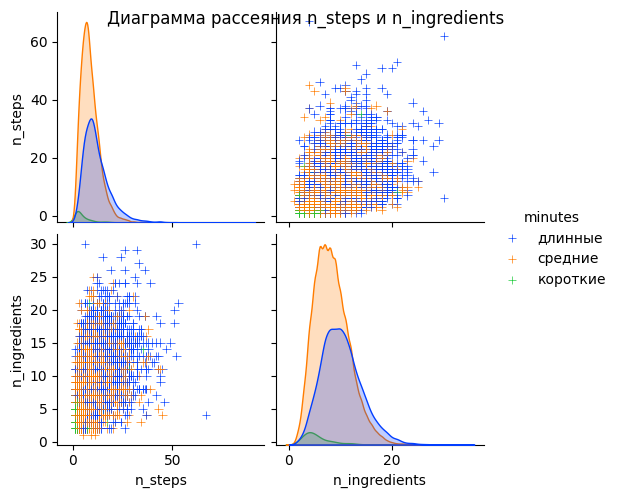

In [ ]:
df3 = recipes[['n_steps', 'n_ingredients', 'minutes']]
r_type = []
for el in df3['minutes']:
  if el < 5:
    r_type.append('короткие')
  elif 5 <= el < 50:
    r_type.append('средние')
  elif el >= 50:
    r_type.append('длинные')

df3['minutes'] = r_type

res = sns.pairplot(df3, hue='minutes', palette='bright', plot_kws=dict(marker='+'))
res.fig.suptitle('Диаграмма рассеяния n_steps и n_ingredients')

Можно заметить, что у коротких (отмечены зеленым) рецептов самое маленькое количество шагов и ингридиентов. У длинных рецептов, наоборот, самое большое количество шагов и ингридиентов (по сравнению с осталными рецептами). Средние рецепты находятся где-то по середине (оранжевые точки на графике расположены между зелеными и синими)

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap).

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`.

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

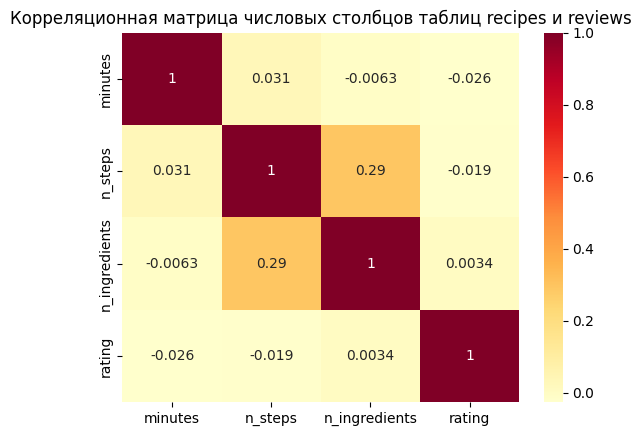

In [ ]:
df4 = pd.merge(recipes, reviews, left_on='id', right_on='recipe_id')
df4.drop(['contributor_id', 'submitted', 'description', 'name', 'user_id', 'review', 'date', 'recipe_id', 'id'], axis=1, inplace=True)
res = sns.heatmap(df4.corr(), cmap='YlOrRd', annot=True).set(title='Корреляционная матрица числовых столбцов таблиц recipes и reviews')